## Install open slide

In [1]:
!pip install openslide-python

In [2]:
!apt-get install python3-openslide

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [3]:
from openslide import open_slide
from openslide.deepzoom import DeepZoomGenerator
import openslide
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import os
import xml.etree.cElementTree as ET
import math
from PIL import ImageDraw
from PIL import ImagePath 
from matplotlib import cm
import h5py

## Mount Google Drive

In [6]:
file='/home/ravi/ravi_data/TCGA-EW-A6S9.svs'


## Open Slide

In [7]:
slide = open_slide(file)

### Properties

In [8]:
slide_props = slide.properties
for i in slide_props:
  print(i)

aperio.AppMag
aperio.DSR ID
aperio.Date
aperio.DisplayColor
aperio.Exposure Scale
aperio.Exposure Time
aperio.Filename
aperio.Focus Offset
aperio.ICC Profile
aperio.ImageID
aperio.Left
aperio.LineAreaXOffset
aperio.LineAreaYOffset
aperio.LineCameraSkew
aperio.MPP
aperio.OriginalHeight
aperio.OriginalWidth
aperio.Parmset
aperio.ScanScope ID
aperio.StripeWidth
aperio.Time
aperio.Time Zone
aperio.Title
aperio.Top
aperio.User
openslide.comment
openslide.level-count
openslide.level[0].downsample
openslide.level[0].height
openslide.level[0].tile-height
openslide.level[0].tile-width
openslide.level[0].width
openslide.level[1].downsample
openslide.level[1].height
openslide.level[1].tile-height
openslide.level[1].tile-width
openslide.level[1].width
openslide.level[2].downsample
openslide.level[2].height
openslide.level[2].tile-height
openslide.level[2].tile-width
openslide.level[2].width
openslide.level[3].downsample
openslide.level[3].height
openslide.level[3].tile-height
openslide.level[3].ti

In [9]:
slide_props['openslide.level[3].downsample']

'32.008184276215125'

In [10]:
slide_props['openslide.objective-power']

'40'

In [11]:
slide_props['openslide.level[0].tile-height'], slide_props['openslide.level[0].tile-width'] 

('240', '240')

In [12]:
slide_props['openslide.level[0].height'], slide_props['openslide.level[0].width'] 


('82362', '117527')

In [13]:
slide_props['openslide.mpp-x'], slide_props['openslide.mpp-y'] 

('0.25269999999999998', '0.25269999999999998')

In [14]:
slide_props['openslide.comment']

'Aperio Image Library v12.0.11 \r\n119888x82462 [0,100 117527x82362] (240x240) JPEG/RGB Q=30|AppMag = 40|StripeWidth = 2032|ScanScope ID = SS1764CNTLR|Filename = TCGA-EW-A6S9-01Z-00-DX1|Title = TCGA-EW-A6S9-01Z-00-DX1|Date = 02/21/14|Time = 10:27:24|Time Zone = GMT-05:00|User = 2eeb7fb9-0f3a-490d-b03f-b73ad26e341b|Parmset = GOG136 on O: Drive|MPP = 0.2527|Left = 20.739414|Top = 21.355202|LineCameraSkew = -0.000153|LineAreaXOffset = 0.011464|LineAreaYOffset = -0.002805|Focus Offset = 0.000000|DSR ID = resc3-dsr2|ImageID = 151240|Exposure Time = 109|Exposure Scale = 0.000001|DisplayColor = 0|OriginalWidth = 119888|OriginalHeight = 82462|ICC Profile = ScanScope v1'

In [15]:
slide.dimensions

(117527, 82362)

### Visualize Thumbnail

(420, 600, 3)


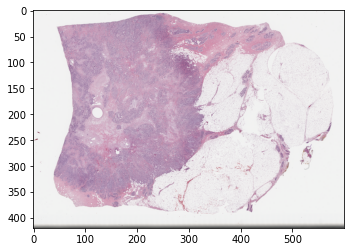

In [16]:
thumb = slide.get_thumbnail(size = (600,600))
print(np.array(thumb).shape)
plt.imshow(thumb)

In [17]:
dims = slide.level_dimensions
print("number of Levels: {}, \n 1. {}, \n 2. {},\n 3. {}, \n 4. {}".format(len(dims), *dims))
# print(*dims)
# print(thumb.shape)

number of Levels: 4, 
 1. (117527, 82362), 
 2. (29381, 20590),
 3. (7345, 5147), 
 4. (3672, 2573)


####Extract 4th level image

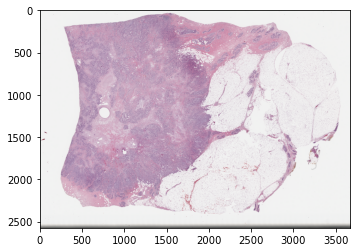

In [18]:
level_4_dim = dims[3]
level4_img = slide.read_region((0,0),3,level_4_dim)
level4_RGB = level4_img.convert('RGB')
plt.imshow(level4_RGB)

In [19]:
print("Factor of Downsampling of 4th level: {}".format(slide.level_downsamples[3]))
print(slide.level_downsamples)

Factor of Downsampling of 4th level: 32.008184276215125
(1.0, 4.0000996206675214, 16.001447954309405, 32.008184276215125)


### Deep Zoom and Tiles


In [33]:

tiles = DeepZoomGenerator(slide, tile_size = 125, limit_bounds=False, overlap=0)
tiles.level_count

18

In [34]:
tiles.level_dimensions

((1, 1),
 (2, 2),
 (4, 3),
 (8, 6),
 (15, 11),
 (29, 21),
 (58, 41),
 (115, 81),
 (230, 161),
 (460, 322),
 (919, 644),
 (1837, 1287),
 (3673, 2574),
 (7346, 5148),
 (14691, 10296),
 (29382, 20591),
 (58764, 41181),
 (117527, 82362))

In [35]:
tiles.tile_count

827628

In [ ]:
level = 0
print("Number of tiles at level {}: {}".format(level, tiles.level_tiles[level]))

Number of tiles at level 0: (1, 1)


In [ ]:
level = 17
print("Number of tiles at level {}: {}".format(level, tiles.level_tiles[level]))

Number of tiles at level 17: (460, 322)


In [ ]:
tile_num = (0,0)
print("Dimensions of tile at {}: {}".format(tile_num, tiles.get_tile_dimensions(level, tile_num)))

Dimensions of tile at (0, 0): (256, 256)


In [ ]:
tile_num = (459,320)
print("Dimensions of tile at {}: {}".format(tile_num, tiles.get_tile_dimensions(level, tile_num)))

Dimensions of tile at (459, 320): (23, 256)


###Display multiple tiles

In [ ]:
tile=[]
tile.append(tiles.get_tile(17, (0, 0)).convert('RGB'))
tile.append(tiles.get_tile(17, (150, 150)).convert('RGB'))
tile.append(tiles.get_tile(17, (459, 321)).convert('RGB'))


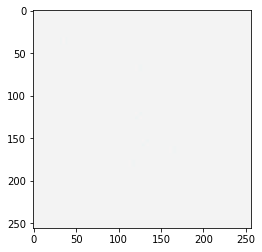

In [ ]:
plt.imshow(tile[0])

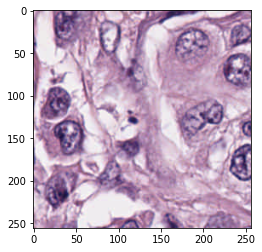

In [ ]:
plt.imshow(tile[1])


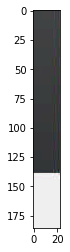

In [ ]:
plt.imshow(tile[2])


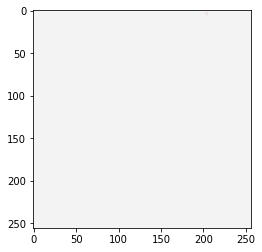

In [ ]:
loc = (0,120)
plt.imshow(tiles.get_tile(17, loc).convert('RGB'))

##Annotation

###Extract xml


In [ ]:
slidepath = "/content/drive/Shareddrives/5MTP/WSI_Samples"  #path to folder of WSIs
annotpath = "/content/drive/Shareddrives/5MTP/WSI_Samples" 
slidename = "TCGA-EW-A6S9.svs"
annotname = "TCGA-EW-A6S9.xml"

In [ ]:
def parse_xml(anno_path):
  tree = ET.ElementTree(file=anno_path)
  anno_list = {}
  root = tree.getroot()
  i = 0
  for cords in root.iter('Vertices'):
    vasc = []
    for cord in cords:
      vasc.append((int(float(cord.attrib.get("X"))/32),int(float(cord.attrib.get("Y"))/32)))
    anno_list[i] = vasc
    i+=1
  return anno_list


In [ ]:
annolist = parse_xml(os.path.join(annotpath, annotname))
print(len(annolist))
print(annolist[7])

10
[(1303, 1342), (1299, 1343), (1288, 1344), (1280, 1345), (1267, 1348), (1256, 1349), (1253, 1351), (1253, 1351), (1252, 1352), (1251, 1353), (1250, 1356), (1248, 1359), (1247, 1360), (1246, 1362), (1245, 1363), (1245, 1363), (1245, 1364), (1244, 1365), (1244, 1368), (1243, 1370), (1243, 1370), (1243, 1371), (1242, 1372), (1242, 1373), (1242, 1375), (1241, 1378), (1240, 1382), (1240, 1384), (1239, 1390), (1239, 1394), (1239, 1397), (1239, 1401), (1239, 1405), (1239, 1407), (1241, 1412), (1242, 1415), (1244, 1419), (1245, 1421), (1248, 1426), (1251, 1431), (1253, 1434), (1256, 1440), (1257, 1444), (1258, 1445), (1259, 1446), (1259, 1448), (1260, 1448), (1260, 1449), (1261, 1450), (1262, 1452), (1263, 1453), (1265, 1455), (1267, 1457), (1267, 1458), (1269, 1460), (1270, 1462), (1272, 1464), (1275, 1468), (1279, 1474), (1281, 1477), (1285, 1480), (1286, 1481), (1286, 1482), (1287, 1482), (1289, 1484), (1293, 1489), (1295, 1491), (1299, 1496), (1303, 1501), (1307, 1507), (1310, 1509), (1

###Generate Mask

3672 2573


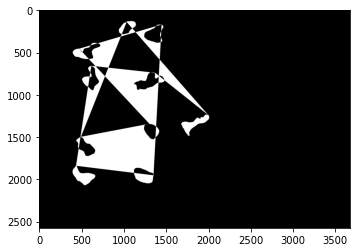

In [ ]:

  
# side = 8
xy = []
# annolist[i] for i in range(10)]
for i in range(10):
  xy = xy + annolist[i]
# print(xy)
n,m = level4_RGB.size
print(n,m)
# image = Image.new('RGB', (n, m)) 
# size = list(map(int, map(math.ceil, image[2:])))
  
img = Image.new("RGB", (n,m), "#000000") 
img1 = ImageDraw.Draw(img)  
img1.polygon(xy, fill ="#FFFFFF", outline ="white") 
  
plt.imshow(img)

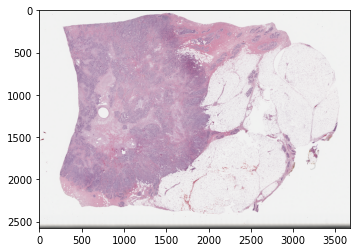

In [ ]:
plt.imshow(level4_RGB)

###Masked WSI 4

0.0
255


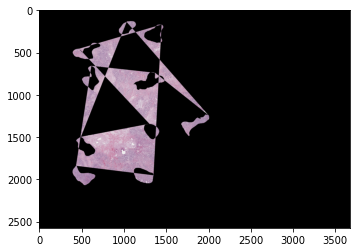

In [ ]:
masked_slide = np.array(level4_RGB) * (np.array(img)/(255))
plt.imshow(masked_slide.astype('uint8'))
print(masked_slide.min())
print((np.array(level4_RGB)).max())

##Different Slide

In [ ]:
slidepath2 = "/content/drive/Shareddrives/5MTP/WSI_Samples"  #path to folder of WSIs
annotpath2 = "/content/drive/Shareddrives/5MTP/WSI_Samples" 
slidename2 = "TCGA-GM-A2DC.svs"
annotname2 = "TCGA-GM-A2DC.xml"

slide2 = open_slide(os.path.join(slidepath2,slidename2))

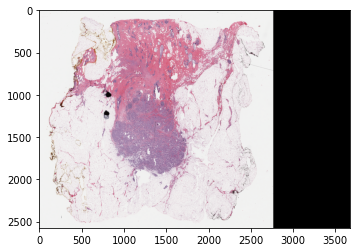

In [ ]:
dims2 = slide2.level_dimensions
level_4_dim2 = dims[3]
level4_img2 = slide2.read_region((0,0),3,level_4_dim2)
level4_RGB2 = level4_img2.convert('RGB')
plt.imshow(level4_RGB2)

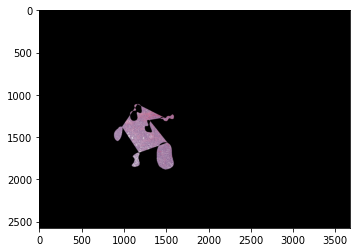

In [ ]:
annolist2 = parse_xml(os.path.join(annotpath2, annotname2))
xy2 = []
# annolist[i] for i in range(10)]
for i in range(len(annolist2)):
  xy2 = xy2 + annolist2[i]
# print(xy)
n,m = level4_RGB2.size
# print(n,m)
# image = Image.new('RGB', (n, m)) 
# size = list(map(int, map(math.ceil, image[2:])))
  
img2 = Image.new("RGB", (n,m), "#000000") 
img1 = ImageDraw.Draw(img2)  
img1.polygon(xy2, fill ="#FFFFFF", outline ="white")

masked_slide = np.array(level4_RGB2) * (np.array(img2)/(255))
plt.imshow(masked_slide.astype('uint8'))

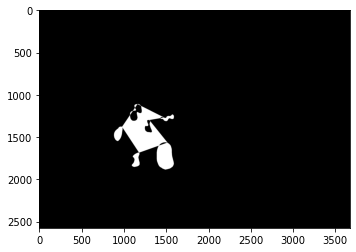

In [ ]:
plt.imshow(img2)

##Functions

###For Extracting kth level Image from slide

In [ ]:
def k_level(slide_path, level=3):
  slide = open_slide(slide_path)
  dims = slide.level_dimensions
  level_k_dim = dims[level]
  levelk_img = slide.read_region((0,0),level,level_k_dim)
  levelk_RGB = levelk_img.convert('RGB')
  slide_props = slide.properties
  sd = 'openslide.level[' + str(level) + '].downsample'
  down = int(float(slide_props[sd]))
  return levelk_RGB, down, slide


###Get mask from xml

In [ ]:
def get_mask(path_xml,level_k_RGB, down):
  tree = ET.ElementTree(file=path_xml)
  anno_list = {}
  root = tree.getroot()
  i = 0
  for cords in root.iter('Vertices'):
    vasc = []
    for cord in cords:
      vasc.append((int(float(cord.attrib.get("X"))/down),int(float(cord.attrib.get("Y"))/down)))
    anno_list[i] = vasc
    i+=1

  xy = []
  # annolist[i] for i in range(10)]
  for i in range(len(anno_list)):
    xy = xy + annolist[i]
  # print(xy)
  n,m = level_k_RGB.size
  # print(n,m)
  # image = Image.new('RGB', (n, m)) 
  # size = list(map(int, map(math.ceil, image[2:])))
  img = Image.new("RGB", (n,m), "#000000") 
  img1 = ImageDraw.Draw(img)  
  img1.polygon(xy, fill ="#FFFFFF", outline ="white") 
  return np.array(img)/255
  # plt.imshow(img)
  # anno_lis

### Extract Patches

In [ ]:
def get_patch(slide, mask_k, patch_size, threshold, level=3):
  (m,n) = mask_k.shape[0:2]
  patches=[]
  coords = []
  masks = []
  slide_props = slide.properties
  sd = 'openslide.level[' + str(level) + '].downsample'
  down = int(float(slide_props[sd]))
  # Not taking last patch because size at the end will be smaller
  for i in range(0,m,patch_size-1):
    for j in range(0,n,patch_size-1):
      mask = mask_k[i:i+patch_size, j:j+patch_size]
      mask_percent = mask.mean()
      if(mask_percent>threshold):
        patches.append((slide.read_region((i*down,j*down),level,(patch_size,patch_size))).convert('RGB'))
        coords.append((i,j))
        masks.append(mask)
  return patches, coords, masks
      


##Save the Patches, Masks and Coordinates

In [ ]:

level = 3
patch_size = 256
thres = 0.6
img_k, down, slide = k_level(os.path.join(slidepath2, slidename2),level)
mask_k = get_mask(os.path.join(annotpath2, annotname2), img_k, down)
patches, coords, masks = get_patch(slide, mask_k, patch_size, thres, level)

# Save Patches
sn = slidename2
save_path = "/content/drive/Shareddrives/5MTP/WSI_Samples/Patches"
for i in range(len(patches)):
  name = sn + str(i) + ".png"
  path_s = os.path.join(save_path, name)
  patches[i].save(path_s)
  mask = Image.fromarray(np.uint8((masks[i])*255))
  name = sn + str(i) + "_mask.png"
  path_mask = os.path.join(save_path, name)
  mask.save(path_mask)
name = sn +"_coords"+ ".h5"
path_h5 = os.path.join(save_path, name)
with h5py.File(path_h5,'w') as h5f:
  h5f.create_dataset(sn, data=np.asarray(coords) )



In [ ]:
with h5py.File(path_h5, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])
print(list(data))

Keys: <KeysViewHDF5 ['TCGA-GM-A2DC.svs']>
[array([ 255, 1275]), array([ 510, 1530]), array([765, 510]), array([765, 765]), array([ 765, 1020]), array([ 765, 1530]), array([1020,  510]), array([1020,  765]), array([1020, 1020]), array([1275,  510]), array([1275,  765]), array([1275, 1020]), array([1530,  510]), array([1530,  765]), array([1530, 1020]), array([1785, 1020])]


## Display Patches

### Display Slide

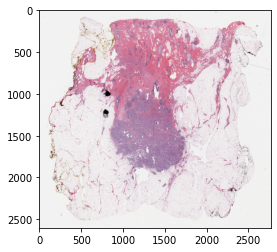

In [ ]:
img_k, down, slide = k_level(os.path.join(slidepath2, slidename2),3)
# mask_k = get_mask(os.path.join(annotpath2, annotname2), img_k, down)
# patches, coords, masks = get_patch(slide, mask_k, 256, 0.6, 3)
plt.imshow(img_k)

### Display Whole mask

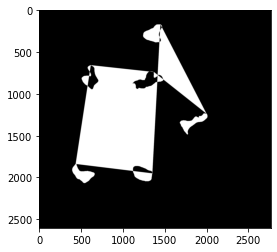

In [ ]:
mask_k = get_mask(os.path.join(annotpath2, annotname2), img_k, down)
plt.imshow(mask_k)

### Display All patches

[(255, 1275), (510, 1530), (765, 510), (765, 765), (765, 1020), (765, 1530), (1020, 510), (1020, 765), (1020, 1020), (1275, 510), (1275, 765), (1275, 1020), (1530, 510), (1530, 765), (1530, 1020), (1785, 1020)]


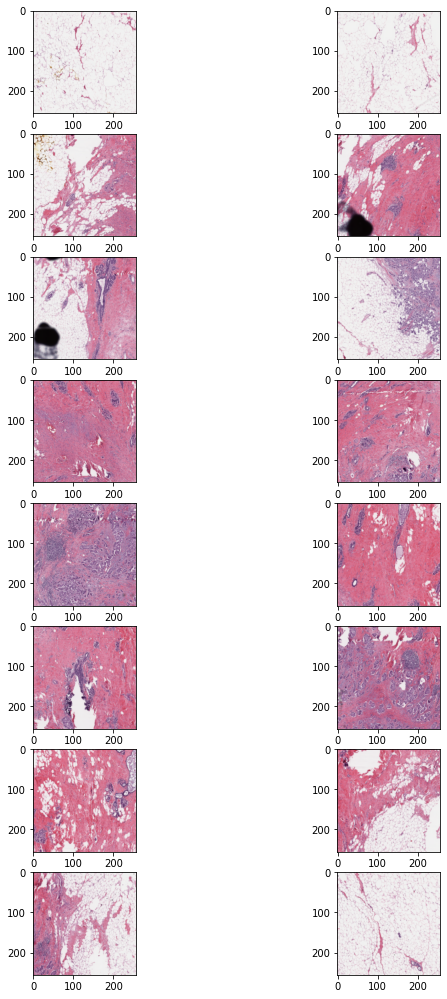

In [ ]:
patches, coords, masks = get_patch(slide, mask_k, 256, 0.6, 3)
# plt.imshow(patches[10])
plt.figure(figsize=(10,20))
# print(patches[0])
# patches = masks
for i in range(0, len(patches),2):
  # print(i)
  plt.subplot(len(patches)//2+1,2,i+1)
  plt.imshow(patches[i])
  if(i+1 < len(patches)):
    plt.subplot(len(patches)//2+1,2,i+2)
    plt.imshow(patches[i+1])
print(coords)


### Display All Masks

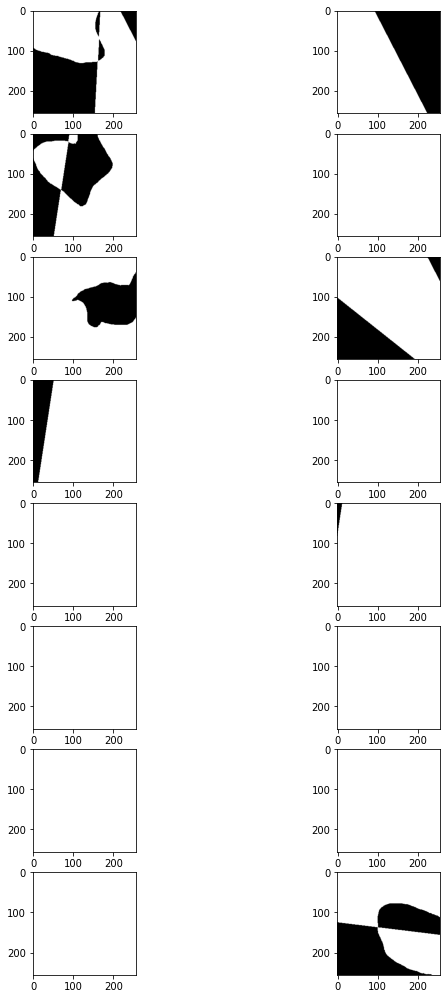

In [ ]:
patches = masks
plt.figure(figsize=(10,20))
for i in range(0, len(patches),2):
  plt.subplot(len(patches)//2+1,2,i+1)
  plt.imshow(patches[i])
  if(i+1 < len(patches)):
    plt.subplot(len(patches)//2+1,2,i+2)
    plt.imshow(patches[i+1])